# Problem 1

# For Text Mining assignment
 

# 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

text mining:
    
    it is nothing but computational methodology which can be used for discovering new piece of information and knowledge from unstructured text data.

In [7]:
data = pd.read_csv("Elon_musk.csv",encoding="latin1")
data.iloc[:,1:2]
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = [Text.strip() for Text in data.Text]
data = [Text for Text in data if Text]
data[0:20]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
# Part of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_data = data[8]
doc_data = nlp(one_data)
spacy.displacy.render(doc_data, style="ent", jupyter=True)

In [10]:
for token in doc_data:
    print(token, token.pos_)

@flcnhvy PROPN
@anonyx10 PROPN
Indeed ADV
! PUNCT
Tweets NOUN
definitely ADV
do AUX
not PART
represent VERB
real ADJ
- PUNCT
world NOUN
time NOUN
allocation NOUN
. PUNCT


In [11]:
# Filtering Noun and verbs
nouns_verbs = [token.text for token in doc_data if token.pos_ in ("NOUN","VERB")]
print(nouns_verbs[0:10])

['Tweets', 'represent', 'world', 'time', 'allocation']


In [12]:
# Counting Tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,tweets,1
1,represent,1
2,world,1
3,time,1
4,allocation,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

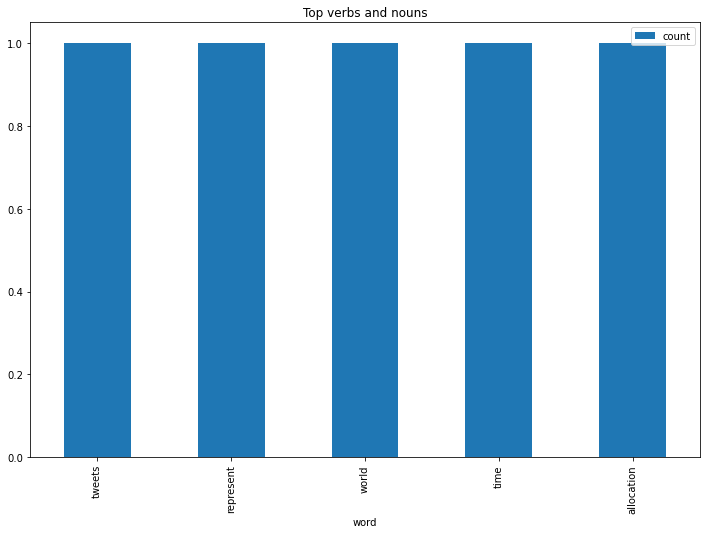

In [13]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [14]:
afinn = pd.read_csv("afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [15]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [18]:
import numpy as np
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


data = pd.read_csv("Elon_musk.csv",encoding="latin1")
data = [Text.strip() for Text in data.Text] 
data = [Text for Text in data if Text] 

In [19]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [20]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [21]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [22]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        sentence = nlp(Text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [23]:
calculate_sentiment(Text = "amazing")

4

In [24]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [25]:
sent_df.sort_values(by="sentiment_value").tail(10)

,sentence,sentiment_value,word_count
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
719,We just havent observed the https://t.co/mez...,17,72


In [26]:
sent_df["sentiment_value"].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

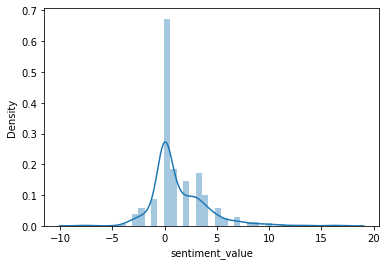

In [27]:
import seaborn as sns
sns.distplot(sent_df["sentiment_value"])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

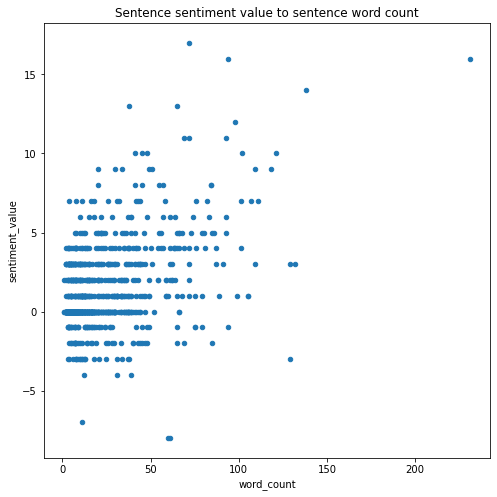

In [28]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Problem 2

# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining


In [42]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [44]:
iphone13_reviews

["\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 "\nIt's a very powerful phone with great camera features. I am really happy with this iPhone.\n",
 '\nHigh benefits with high price. I m in love with this device.\n',
 '\nSwitched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Softwar

In [45]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [46]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [47]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'it', 's', 'a', 'very', 'powerful', 'phone', 'with', 'great', 'camera', 'features', 'i', 'am', 'really', 'happy', 'with', 'this', 'iphone', 'high', 'benefits', 'with', 'high', 'price', 'i', 'm', 'in', 'love', 'with', 'this', 'device', 'switched', 'from', 'android', 'to', 'iphone', 'here', 'are', 'my', 'pros', 'and', 'cons', 'pros', 'the', 'battery', 'life', 'on', 'the', 'pro', 'max', 'is', 'just', 'excellent', 'no', 'android', 'with', 'even', 'a', 'mah', 'can', 'beat', 'it', 'it', 'is', 'that', 'well', 'optimised', 'the', 'camera', 'as', 'you', 'can', 'guess', 'is', 'one', 'of', 'the', 'best', 'if', 'not', 'the',

In [49]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [54]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone13_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [55]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [75]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)
ip_rev_para

' powerful phone great camera features happy iphone powerful phone great camera features happy iphone high benefits high price love device powerful phone great camera features happy iphone high benefits high price love device switched android iphone pros cons pros battery life pro max excellent android mah beat optimised camera guess screen hz feels smooth experience androids similar refresh don feel smooth poorly optimised cons price gb pro max lac amount money spend charger software wise notifications bad android compiles notifications tricky transfer whatsapp stuff android powerful phone great camera features happy iphone high benefits high price love device switched android iphone pros cons pros battery life pro max excellent android mah beat optimised camera guess screen hz feels smooth experience androids similar refresh don feel smooth poorly optimised cons price gb pro max lac amount money spend charger software wise notifications bad android compiles notifications tricky trans

In [73]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
 poswords = pos.read().split("\n")

In [76]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
ip_pos

' powerful great happy powerful great happy benefits love powerful great happy benefits love pros pros excellent smooth refresh smooth wise powerful great happy benefits love pros pros excellent smooth refresh smooth wise powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent good powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent good powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent good powerful great happy benefits love pros pros excellent smooth refresh smooth wise excellent good beauty '

In [78]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [79]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])
ip_neg

' cons poorly cons bad tricky cons poorly cons bad tricky expensive cons poorly cons bad tricky expensive cons poorly cons bad tricky expensive cons poorly cons bad tricky expensive drains doubt cons poorly cons bad tricky expensive drains doubt cons poorly cons bad tricky expensive drains doubt cons poorly cons bad tricky expensive drains doubt hell '